<a href="https://colab.research.google.com/github/michellechen202212/ucb/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

The task is to analyze a dataset of used cars to identify the key variables that influence price. This involves formulating a predictive modeling problem where the target variable is the car price, and the independent variables include factors such as manufacturer, fuel type, mileage, year, and vehicle type. By applying techniques like feature engineering, regression analysis, and model evaluation, the goal is to uncover the most significant predictors and provide actionable insights for pricing and inventory strategies.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Overview of the Dataset
Inspect Structure:
Use functions like .head(), .info(), and .describe() to understand the dataset's structure, types of variables, and general summary statistics.

# Key Questions:
How many records and features are present?

What types of data are included (e.g., numerical, categorical, text)?

Are there features directly related to car prices and the business objective?

In [ ]:
import pandas as pd

# Load the dataset to explore its structure
file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
vehicles_data.head(), vehicles_data.info(), vehicles_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(           id                  region  price  year manufacturer model  \
 0  7222695916                prescott   6000   NaN          NaN   NaN   
 1  7218891961            fayetteville  11900   NaN          NaN   NaN   
 2  7221797935            florida keys  21000   NaN          NaN   NaN   
 3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
 4  7210384030              greensboro   4900   NaN          NaN   NaN   
 
   condition cylinders fuel  odometer title_status transmission  VIN drive  \
 0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 
   size type paint_color state  
 0  NaN  NaN         NaN    az  
 1  NaN  NaN      

# Data Completeness
## Check for Missing Values:
Identify missing or null values in the dataset using .isnull().sum().

## Action:
Decide whether to drop rows or columns with excessive missing data or impute missing values based on context.

In [ ]:
# Display columns with missing values
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Action: Decide on handling missing values
# Set a threshold for excessive missing data (e.g., drop columns with more than 50% missing values)
threshold = 0.5
columns_to_drop = missing_values[missing_values > len(vehicles_data) * threshold].index

# Drop columns with excessive missing values
vehicles_data_cleaned = vehicles_data.drop(columns=columns_to_drop)
print(f"\nDropped columns with more than {threshold * 100}% missing values: {list(columns_to_drop)}")

# For remaining missing values, decide to drop or impute (example: impute numerical columns with median)
numerical_columns = vehicles_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if vehicles_data_cleaned[col].isnull().sum() > 0:
        vehicles_data_cleaned[col].fillna(vehicles_data_cleaned[col].median(), inplace=True)

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_columns = vehicles_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if vehicles_data_cleaned[col].isnull().sum() > 0:
        vehicles_data_cleaned[col].fillna(vehicles_data_cleaned[col].mode()[0], inplace=True)

# Confirm no missing values remain
print("\nMissing Values After Handling:")
print(vehicles_data_cleaned.isnull().sum())

cleaned_file_path = 'sample_data/vehicles_cleaned.csv'
vehicles_data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}.")

# Data Consistency
## Inspect Categorical Variables:
Look for inconsistencies or errors (e.g., different spellings of the same manufacturer or fuel type).

Standardize categories for analysis (e.g., using str.lower() or grouping similar values).

## Check Numerical Variables:
Ensure numerical values are within reasonable ranges (e.g., no negative mileage or zero prices).

Look for unrealistic entries, such as a car priced at $1 or with an odometer reading of 1,000,000 miles.


In [ ]:
# Load the cleaned dataset (replace 'vehicles_cleaned.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Inspect categorical variables for inconsistencies
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']

# Standardize text data to lowercase and remove extra spaces
for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        vehicles_data_cleaned[col] = vehicles_data_cleaned[col].str.lower().str.strip()

# Display unique values in each categorical column for inspection
print("Unique values in categorical columns after standardization:")
for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        print(f"\n{col}:")
        print(vehicles_data_cleaned[col].unique())

# Check numerical variables for unreasonable values
numerical_columns = ['price', 'odometer', 'year']

# Define reasonable ranges for the numerical columns
reasonable_ranges = {
    'price': (100, 200000),  # Prices should be between $100 and $200,000
    'odometer': (0, 300000),  # Odometer readings should be between 0 and 300,000 miles
    'year': (1900, 2024)  # Vehicle year should be between 1900 and the current year
}

# Check for unreasonable values in numerical columns
print("\nUnreasonable values in numerical columns:")
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        min_val, max_val = reasonable_ranges[col]
        out_of_range = vehicles_data_cleaned[(vehicles_data_cleaned[col] < min_val) | (vehicles_data_cleaned[col] > max_val)]
        print(f"\n{col}:")
        print(out_of_range[[col]].head())  # Display a sample of rows with unreasonable values

# Summary of the data consistency process
print("\nData consistency checks completed. Review the outputs above to identify inconsistencies or errors.")


Unique values in categorical columns after standardization:

manufacturer:
['ford' 'gmc' 'chevrolet' 'toyota' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']

fuel:
['gas' 'other' 'diesel' 'hybrid' 'electric']

condition:
['good' 'excellent' 'fair' 'like new' 'new' 'salvage']

type:
['sedan' 'pickup' 'truck' 'other' 'coupe' 'suv' 'hatchback' 'mini-van'
 'offroad' 'bus' 'van' 'convertible' 'wagon']

paint_color:
['white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow' 'orange'
 'green' 'custom' 'purple']

Unreasonable values in numerical columns:

price:
    price
10      0
11      0
12      0
13      0
14      0

odometer:
      odometer
280   999999.0
455  9999

# Data Distributions
## Explore Feature Distributions:
Visualize numerical variables with histograms or box plots to identify skewness, outliers, or data entry errors.

Use value counts or bar charts to understand the distribution of categorical variables.
## Action:

Identify and handle outliers using methods like interquartile range (IQR).


# Steps in the Code
## 1. Explore Feature Distributions
### Numerical Variables:
Visualized using histograms to assess distribution (e.g., skewness) and box plots to identify potential outliers.

### Categorical Variables:
Visualized using bar charts to understand the frequency of categories.

### 2. Handle Outliers
Interquartile Range (IQR):

Calculated for each numerical column.

Outliers are defined as values outside the range
[Q1−1.5×IQR,Q3+1.5×IQR].

Rows with outliers are removed.
### 3. Save Cleaned Dataset
Optionally saves the dataset after handling outliers to a new file

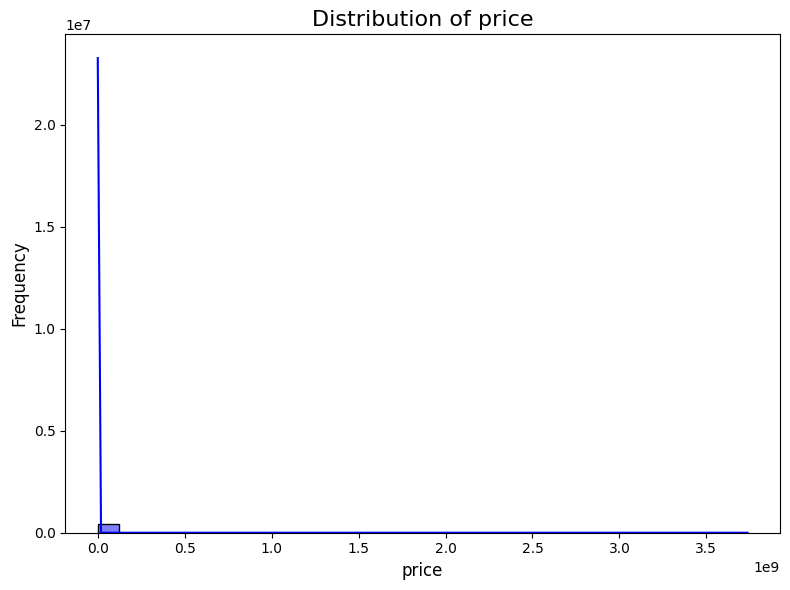

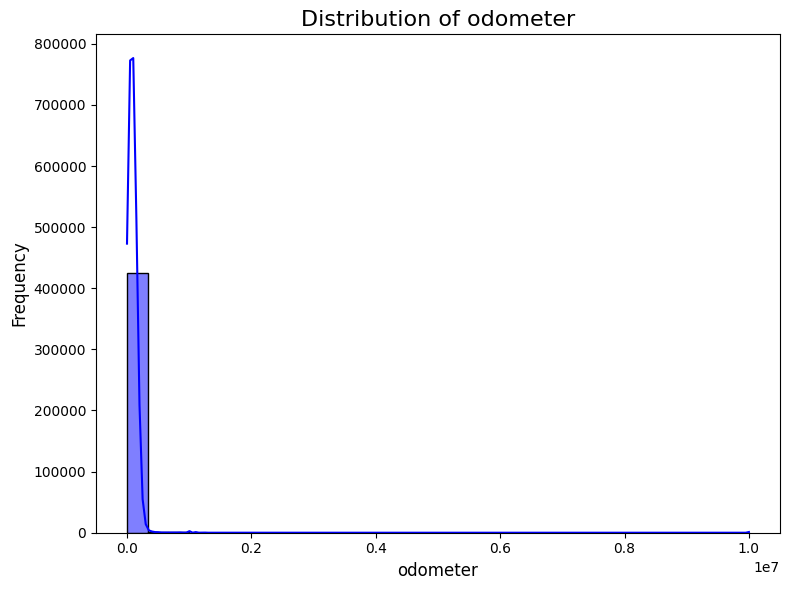

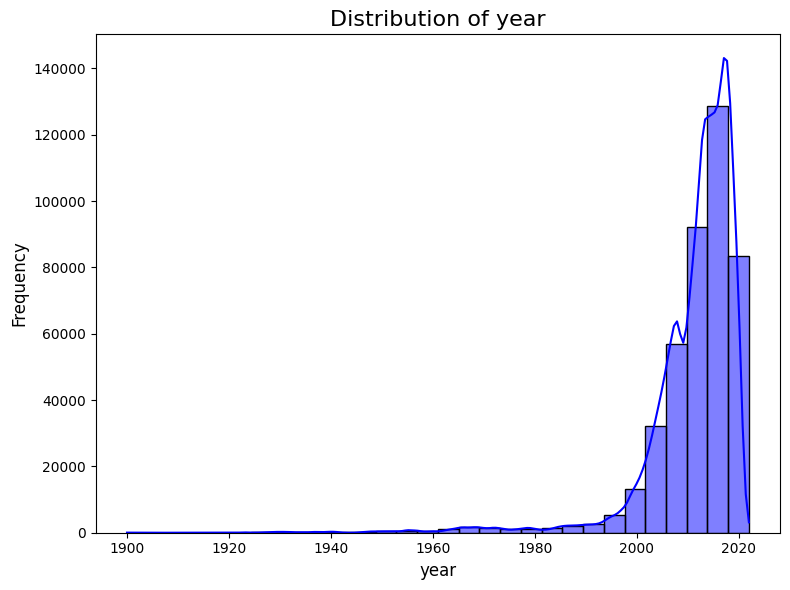

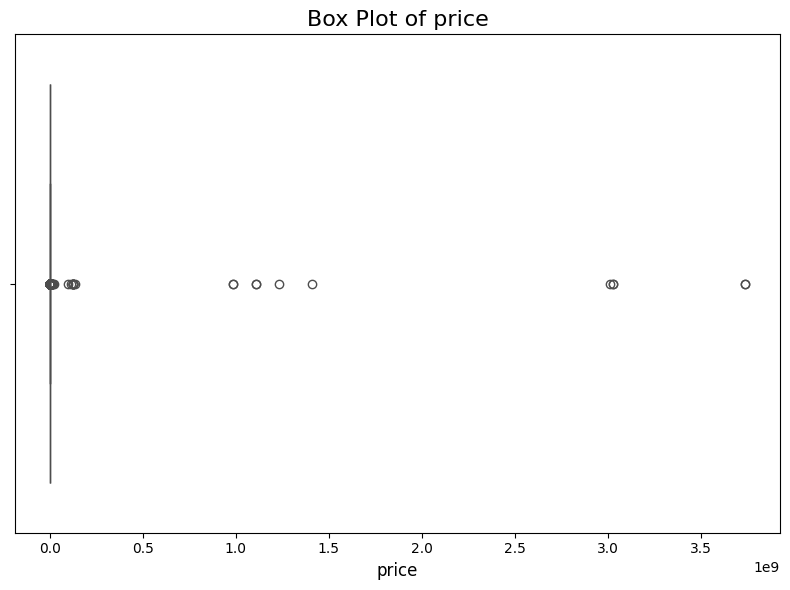

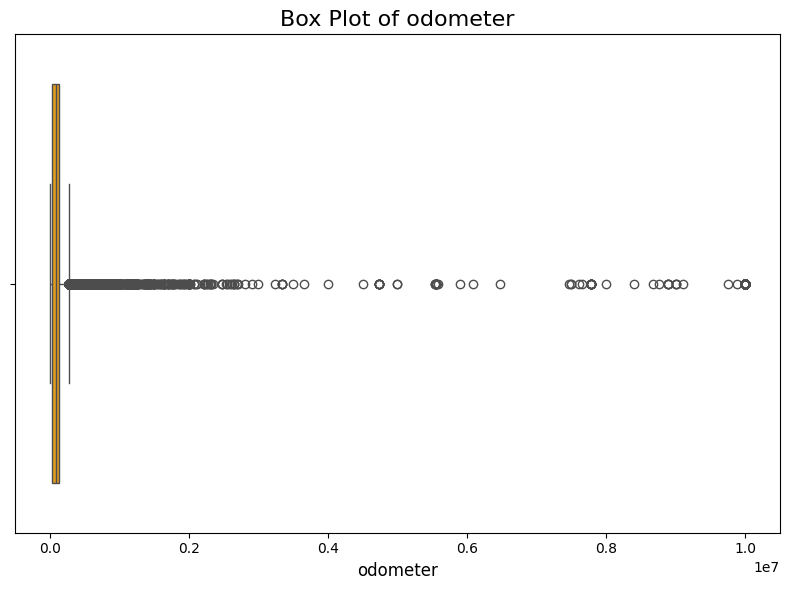

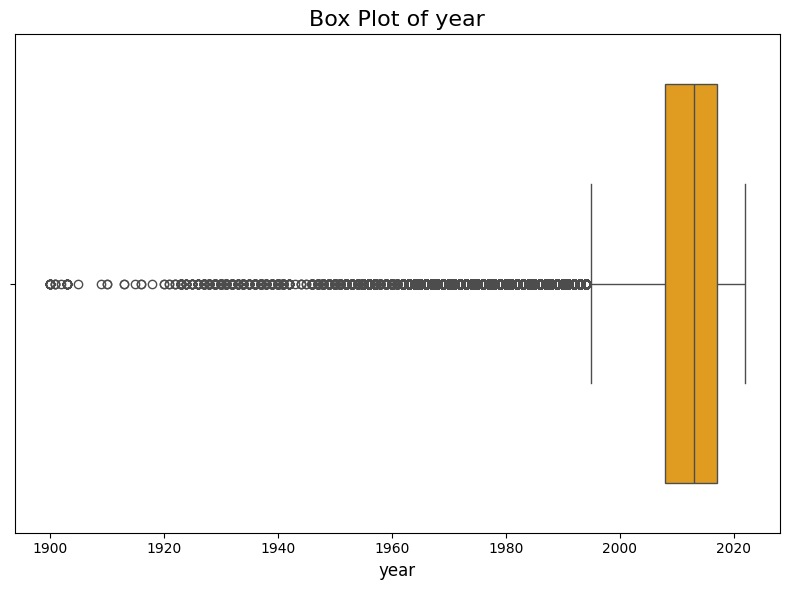

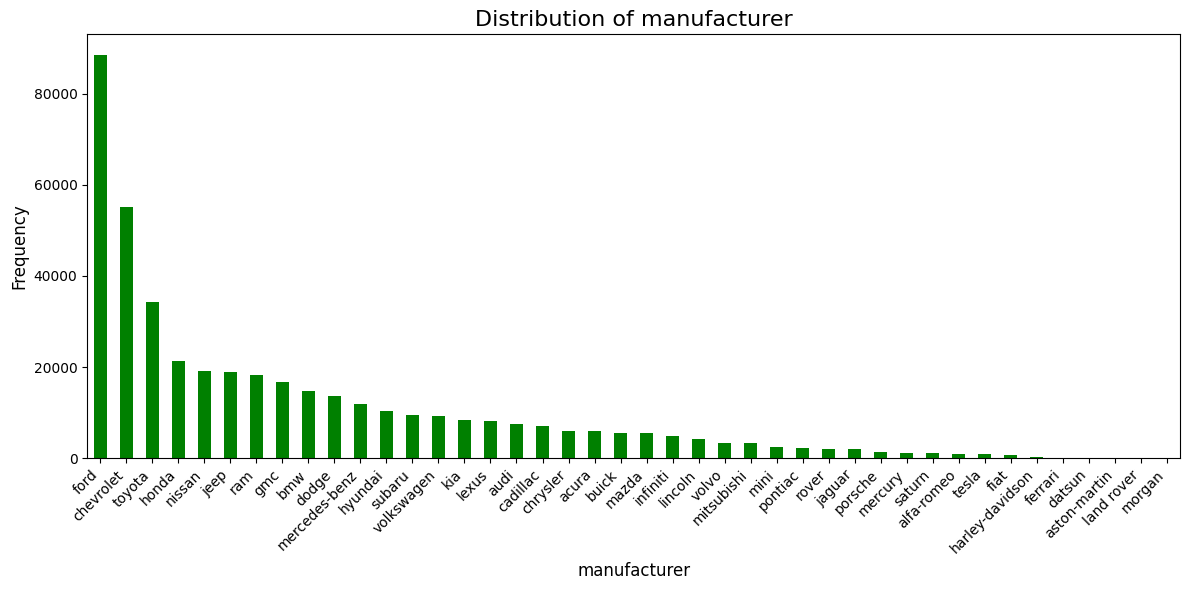

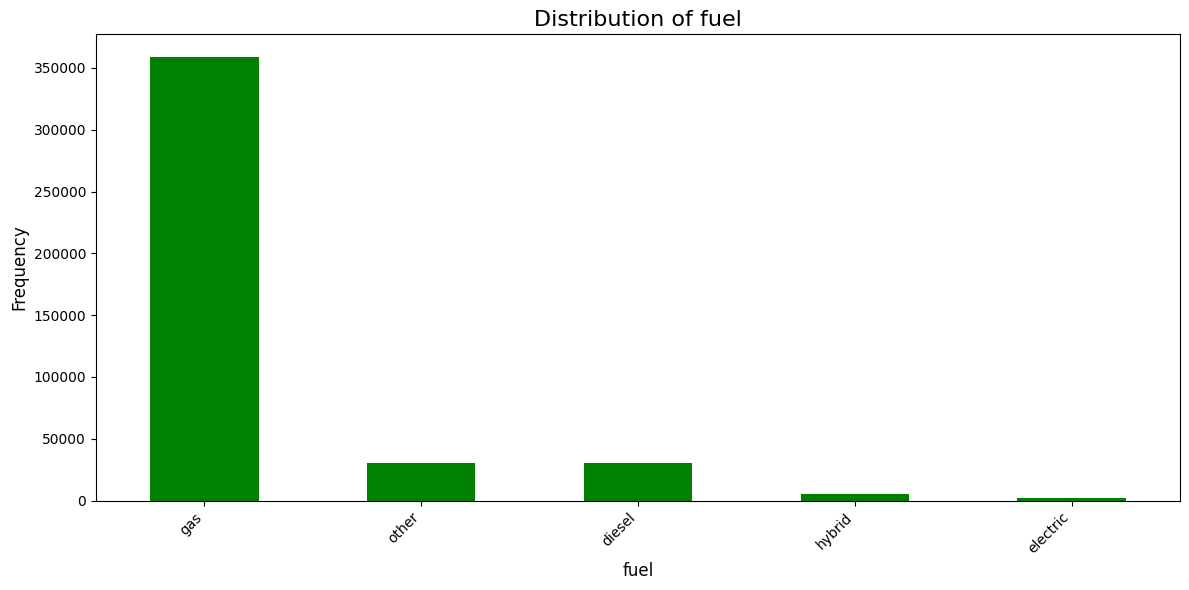

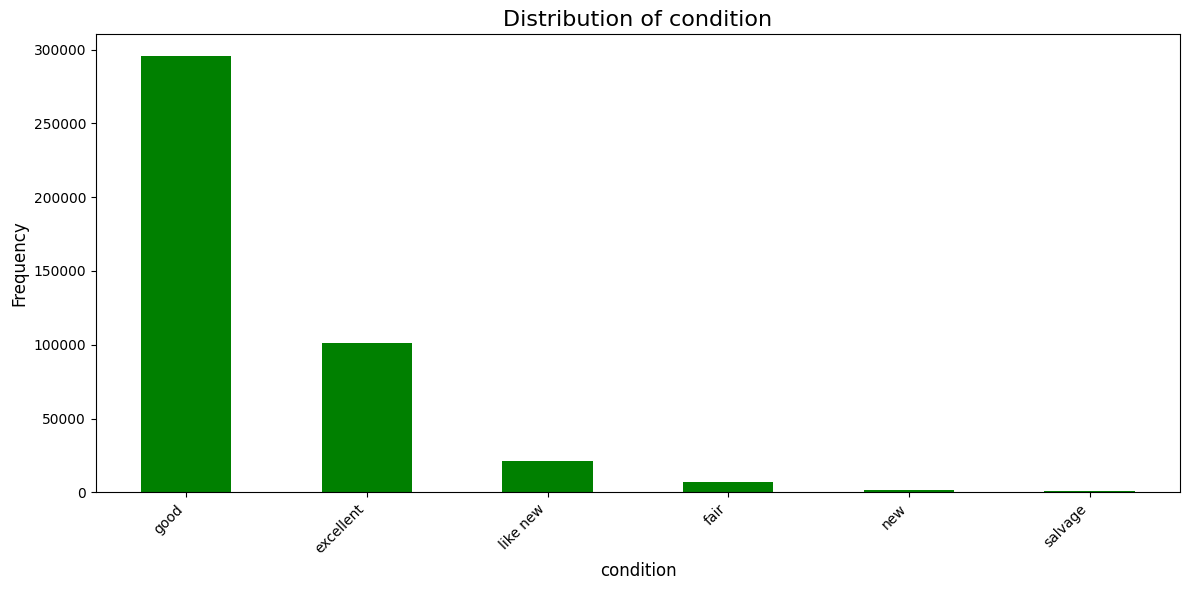

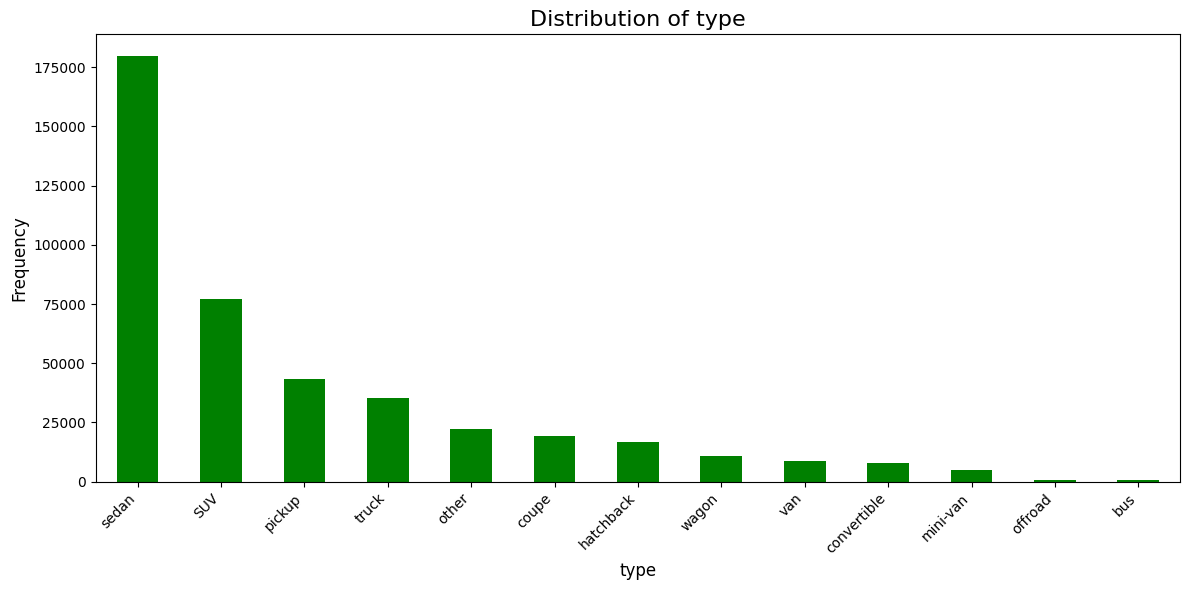

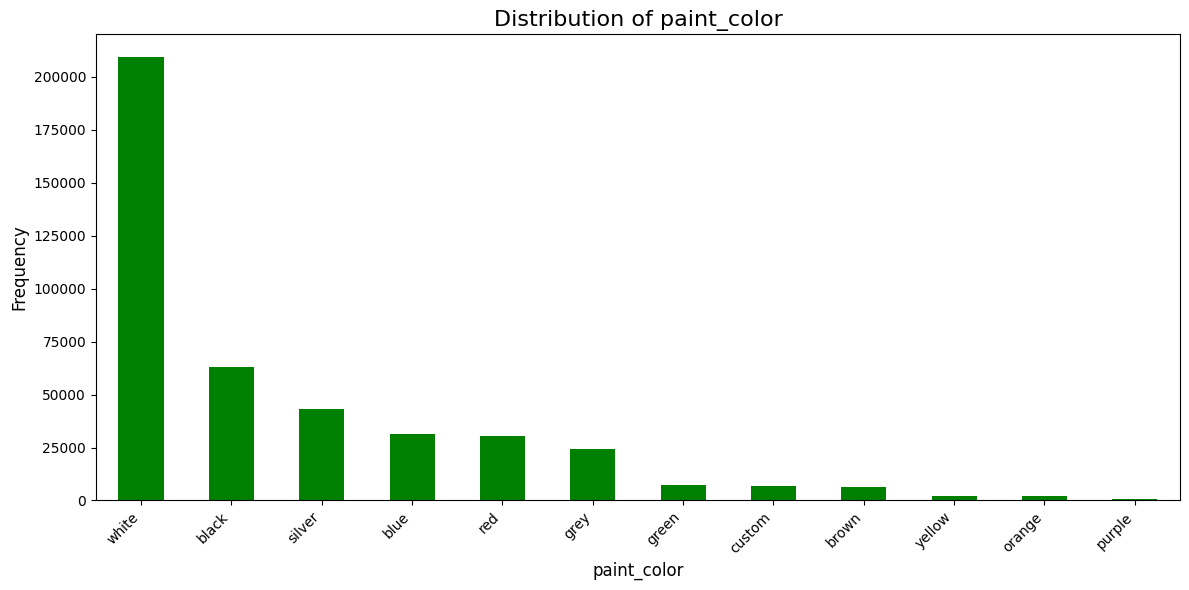

Dataset saved to sample_data/vehicles_cleaned_no_outliers.csv after handling outliers.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (replace 'vehicles_cleaned.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Explore Feature Distributions: Visualize numerical variables
numerical_columns = ['price', 'odometer', 'year']

# Histograms for numerical variables
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(vehicles_data_cleaned[col], bins=30, kde=True, color='blue')
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.tight_layout()
        plt.show()

# Box plots for numerical variables to identify outliers
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=vehicles_data_cleaned[col], color='orange')
        plt.title(f'Box Plot of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.tight_layout()
        plt.show()

# Explore Feature Distributions: Categorical variables
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']

# Bar charts for categorical variables
for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(12, 6))
        vehicles_data_cleaned[col].value_counts().plot(kind='bar', color='green')
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Action: Handle outliers using IQR for numerical columns
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for numerical variables
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        vehicles_data_cleaned = handle_outliers_iqr(vehicles_data_cleaned, col)

# Save the dataset after handling outliers (optional)
cleaned_file_path_after_outliers = 'sample_data/vehicles_cleaned_no_outliers.csv'
vehicles_data_cleaned.to_csv(cleaned_file_path_after_outliers, index=False)
print(f"Dataset saved to {cleaned_file_path_after_outliers} after handling outliers.")



# Relationships Between Variables
## Examine Correlations:
Use a heatmap or correlation matrix to explore relationships between numerical variables.

Identify features that are strongly correlated with price, as they are likely key drivers.

## Cross-Tabulations for Categorical Variables:
Assess how categorical variables (e.g., manufacturer or fuel type) influence price using group means or pivot tables.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset (replace 'vehicles_cleaned_no_outliers.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned_no_outliers.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Examine Correlations: Heatmap for numerical variables
numerical_columns = ['price', 'odometer', 'year']

# Compute correlation matrix
correlation_matrix = vehicles_data_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix for Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Identify features strongly correlated with price
strong_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Features Strongly Correlated with Price:")
print(strong_correlation)

# Cross-Tabulations for Categorical Variables
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']

# Group means for each categorical variable
for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        group_means = vehicles_data_cleaned.groupby(col)['price'].mean().sort_values(ascending=False)
        print(f"\nAverage Price by {col.capitalize()}:")
        print(group_means)

# Example Pivot Table: Manufacturer vs Price
pivot_table = vehicles_data_cleaned.pivot_table(values='price', index='manufacturer', aggfunc='mean').sort_values(by='price', ascending=False)
print("\nPivot Table: Average Price by Manufacturer:")
print(pivot_table)


# Document Issues:
Note missing values, inconsistent data entries, outliers, or irrelevant columns.

Assess whether features align with business objectives or require transformation for better interpretability.

In [ ]:
# Load the cleaned dataset (replace 'vehicles_cleaned_no_outliers.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned_no_outliers.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Document Missing Values
missing_values = vehicles_data_cleaned.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Document Inconsistent Data Entries
# Example: Checking categorical variables for unique values to identify inconsistencies
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']
print("\nInconsistent Data Entries in Categorical Variables:")
for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        print(f"\n{col}:")
        print(vehicles_data_cleaned[col].unique())

# Document Outliers
# Numerical variables to check for outliers
numerical_columns = ['price', 'odometer', 'year']

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("\nOutliers Detected in Numerical Variables:")
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        outliers = detect_outliers_iqr(vehicles_data_cleaned, col)
        print(f"\n{col}: {len(outliers)} outliers detected")

# Document Irrelevant Columns
# Example: Checking columns that might not align with business objectives
irrelevant_columns = [col for col in vehicles_data_cleaned.columns if vehicles_data_cleaned[col].nunique() == 1]
print("\nIrrelevant Columns (Single Unique Value):")
print(irrelevant_columns)

# Assess Feature Alignment with Business Objectives
# Example: Print summary statistics to decide if features require transformation
print("\nSummary Statistics of Numerical Features:")
print(vehicles_data_cleaned[numerical_columns].describe())

print("\nData Quality Assessment Completed. Review outputs to address issues.")


Missing Values in Each Column:
Series([], dtype: int64)

Inconsistent Data Entries in Categorical Variables:

manufacturer:
['ford' 'gmc' 'chevrolet' 'toyota' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury' 'harley-davidson'
 'ferrari' 'aston-martin' 'land rover' 'morgan']

fuel:
['gas' 'other' 'diesel' 'hybrid' 'electric']

condition:
['good' 'excellent' 'fair' 'like new' 'new' 'salvage']

type:
['sedan' 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van'
 'offroad' 'bus' 'van' 'convertible' 'wagon']

paint_color:
['white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow' 'orange'
 'green' 'custom' 'purple']

Outliers Detected in Numerical Variables:

price: 491 outliers detected

odometer: 209 outliers detected

year: 2373 out

# Preliminary Feature Importance
Perform a quick univariate analysis to see which variables show a clear relationship with price.

This step helps identify which features to prioritize for modeling.




# . Numerical Variables
## Scatter Plots:
Plots the relationship between odometer and price, and year and price.

Helps visualize potential trends or correlations.

# 2. Categorical Variables
## Box Plots:
Visualizes the distribution of prices across categories like manufacturer, fuel, condition, type, and paint_color.

Highlights potential drivers of price based on categorical groupings.

# 3. Insights
The plots give an initial idea of which features are strongly related to price and should be prioritized in modeling.


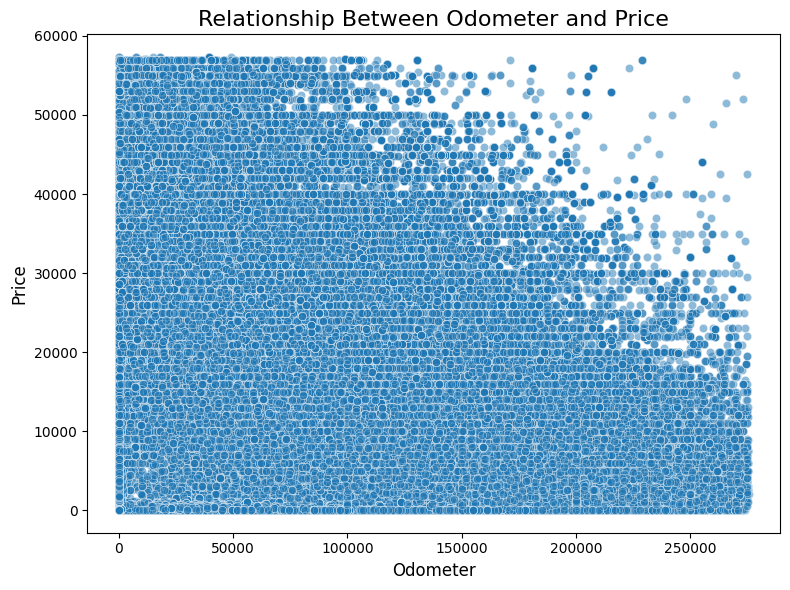

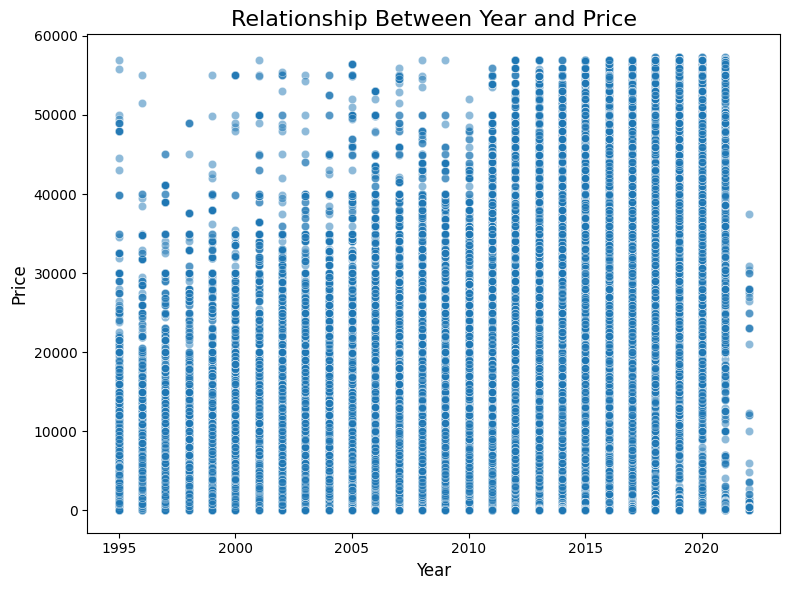

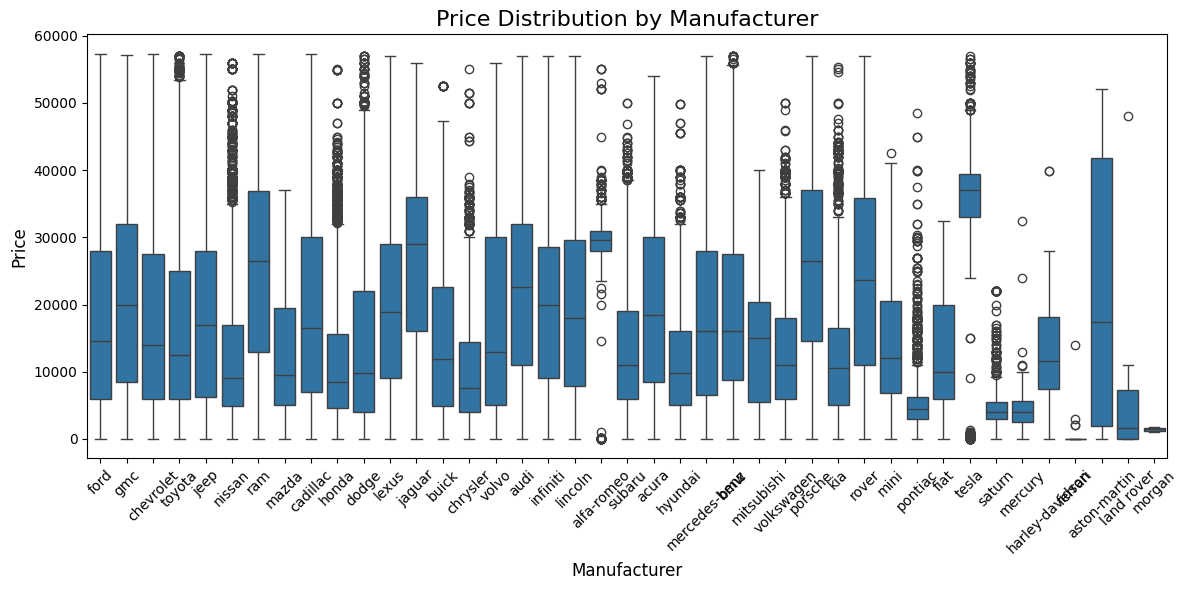

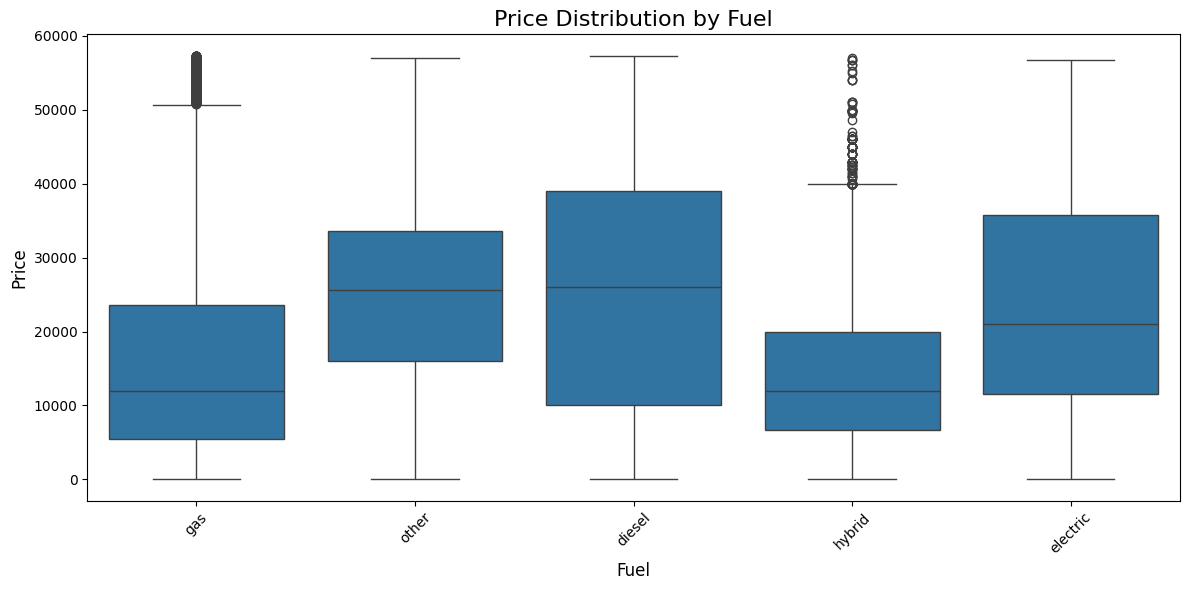

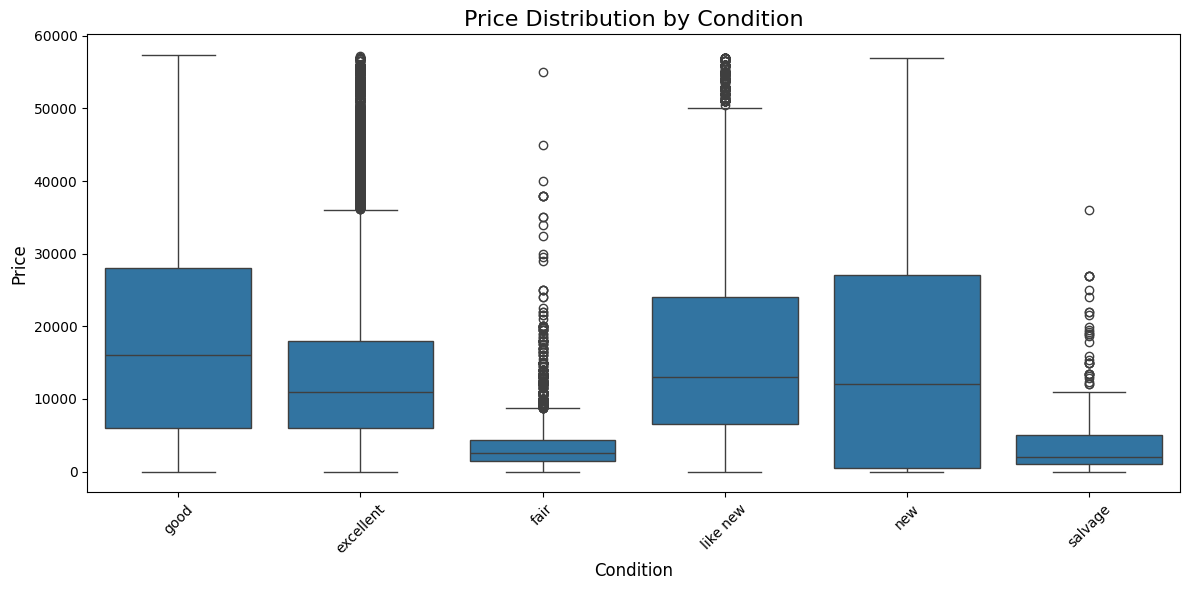

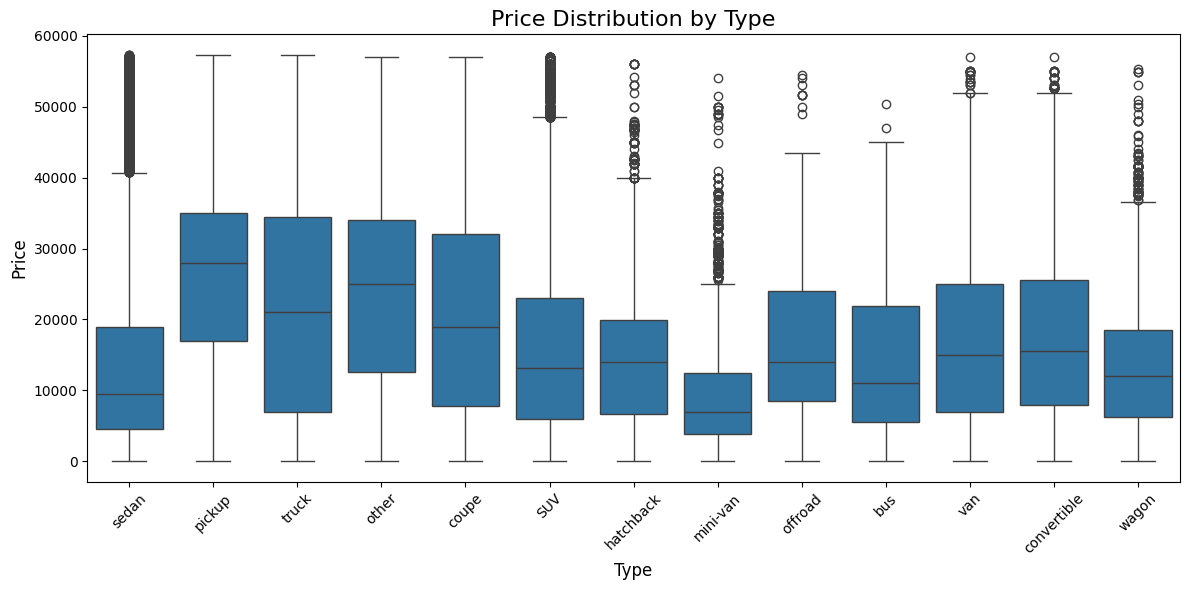

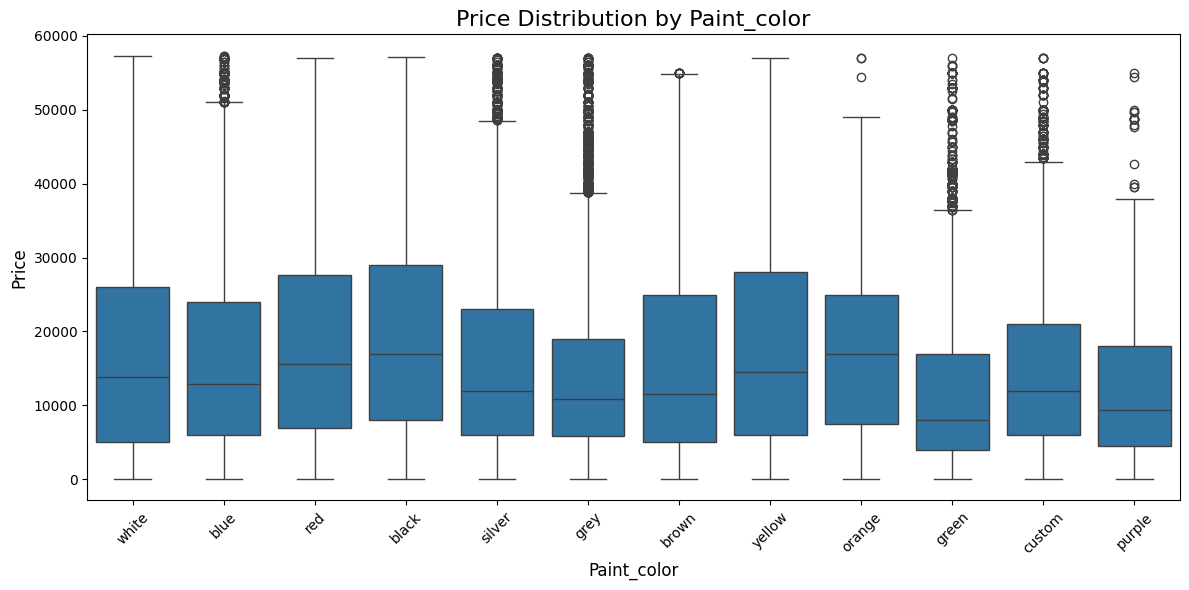


Preliminary Insights:
1. Numerical variables like 'odometer' and 'year' are expected to have clear linear relationships with price.
2. Categorical variables such as 'manufacturer' and 'fuel' are likely key drivers, as seen in box plot trends.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset (replace 'vehicles_cleaned_no_outliers.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned_no_outliers.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Numerical Variables: Relationship with Price
numerical_columns = ['odometer', 'year']

# Scatter plots to examine relationships
for col in numerical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=vehicles_data_cleaned[col], y=vehicles_data_cleaned['price'], alpha=0.5)
        plt.title(f'Relationship Between {col.capitalize()} and Price', fontsize=16)
        plt.xlabel(col.capitalize(), fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.tight_layout()
        plt.show()

# Categorical Variables: Relationship with Price (Box plots for clear visualization)
categorical_columns = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']

for col in categorical_columns:
    if col in vehicles_data_cleaned.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=vehicles_data_cleaned[col], y=vehicles_data_cleaned['price'])
        plt.title(f'Price Distribution by {col.capitalize()}', fontsize=16)
        plt.xlabel(col.capitalize(), fontsize=12)
        plt.ylabel('Price', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Summary of Preliminary Feature Importance
print("\nPreliminary Insights:")
print("1. Numerical variables like 'odometer' and 'year' are expected to have clear linear relationships with price.")
print("2. Categorical variables such as 'manufacturer' and 'fuel' are likely key drivers, as seen in box plot trends.")


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

# 1. Handle Integrity Issues
Selected relevant features (odometer, year, manufacturer, etc.) and the target variable (price).
Dropped rows with missing values in the target column.
# 2. Feature Engineering and Transformations
## Numerical Features:
Applied standard scaling using StandardScaler to normalize variables like odometer and year.

## Categorical Features:
Used OneHotEncoder to encode categorical variables (e.g., manufacturer, fuel).
# 3. Pipeline for Transformation
Created a preprocessing pipeline with ColumnTransformer to handle numerical and categorical transformations in one step.
# 4. Dataset Preparation
Applied the transformations to features (X) and retained the target variable (y) for modeling.
# 5. Saved Prepared Data
Saved the transformed features (X_transformed) and target variable (y) for future use.


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the cleaned dataset (replace 'vehicles_cleaned_no_outliers.csv' with your actual file path)
file_path = 'sample_data/vehicles_cleaned_no_outliers.csv'
vehicles_data_cleaned = pd.read_csv(file_path)

# Define features and target
features = ['odometer', 'year', 'manufacturer', 'fuel', 'condition', 'type', 'paint_color']
target = 'price'

# Select relevant features and drop rows with missing target values if any
final_data = vehicles_data_cleaned[features + [target]].dropna()

# Numerical and Categorical features separation
numerical_features = ['odometer', 'year']
categorical_features = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']

# Transformation: Scaling numerical features and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standard scaling for numerical variables
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encoding for categorical variables
    ]
)

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)  # Apply transformations to data
])

# Apply the pipeline to prepare the final dataset for modeling
X = final_data[features]  # Independent variables
y = final_data[target]  # Dependent variable

# Transform the features using the pipeline
X_transformed = pipeline.fit_transform(X)

# Summary of the transformations applied
print("Final dataset prepared for modeling:")
print(f"Number of samples: {X_transformed.shape[0]}")
print(f"Number of features after transformations: {X_transformed.shape[1]}")

# Optional: Save the transformed dataset for future use (e.g., as a NumPy array)
import numpy as np

# transformed_file_path = 'sample_data/final_dataset.npy'
# np.save(transformed_file_path, X_transformed)
# print(f"Transformed dataset saved to {transformed_file_path}.")

# # Save target variable as a separate file
# target_file_path = 'sample_data/final_target.npy'
# np.save(target_file_path, y.values)
# print(f"Target variable saved to {target_file_path}.")



from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset (replace 'sample_data/final_dataset.npy' with your actual file path)
transformed_file_path = 'sample_data/final_dataset.npy'
X = np.load(transformed_file_path, allow_pickle=True).item()  # Extract sparse matrix

# Apply TruncatedSVD for dimensionality reduction
# Define the SVD pipeline
svd_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # Scale sparse data without centering
    ('svd', TruncatedSVD(n_components=50, random_state=42))  # Reduce to 50 components (adjust as needed)
])

X_reduced = svd_pipeline.fit_transform(X)


# Summary of the transformation
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_reduced.shape[1])

# Optional: Save the reduced dataset
reduced_file_path = 'sample_data/reduced_dataset.npy'
np.save(reduced_file_path, X_reduced)
print(f"Reduced dataset saved to {reduced_file_path}.")






Final dataset prepared for modeling:
Number of samples: 399448
Number of features after transformations: 79
Original number of features: 79
Reduced number of features: 50
Reduced dataset saved to sample_data/reduced_dataset.npy.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the prepared dataset and target variable (replace file paths with your paths if needed)
transformed_file_path = 'sample_data/final_dataset.npy'
target_file_path = 'sample_data/reduced_dataset.npy'


# Ensure that the sparse matrix is extracted properly
X = np.load(transformed_file_path, allow_pickle=True).item()  # Extract the sparse matrix from the object array
y = np.load(target_file_path, allow_pickle=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes
print(f"Training data shape: {X_train.shape}, Training target shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing target shape: {y_test.shape}")

# Initialize models to explore
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(max_iter=100)
    # 'Random Forest Regressor': RandomForestRegressor()
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1, 10, 100]},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1, 10]}
    # 'Random Forest Regressor': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
}

# Perform modeling and cross-validation
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # If hyperparameter tuning is needed
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best Parameters for {model_name}: {best_params}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)

    # Evaluate model using cross-validation
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
    print(f"Cross-Validation R² Scores for {model_name}: {cv_scores}")
    print(f"Mean CV R²: {cv_scores.mean():.4f}")

    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test R² for {model_name}: {test_r2:.4f}")
    print(f"Test RMSE for {model_name}: {test_rmse:.4f}\n")

    # Store results
    results[model_name] = {
        'Best Parameters': best_params if model_name in param_grids else None,
        'Mean CV R²': cv_scores.mean(),
        'Test R²': test_r2,
        'Test RMSE': test_rmse
    }

# Summarize results
print("Modeling Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selecting relevant columns for regression
features = ['year', 'manufacturer', 'fuel', 'odometer', 'condition', 'type', 'paint_color']
target = 'price'
vehicles_regression_data = vehicles_data_cleaned[features + [target]].dropna()

# Splitting into features (X) and target (y)
X = vehicles_regression_data[features]
y = vehicles_regression_data[target]

# Preprocessing: One-hot encoding categorical variables and scaling numerical variables
categorical_features = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']
numerical_features = ['year', 'odometer']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing to the training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Training the regression model
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_transformed)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Coefficients of the model (feature importance)
coefficients = model.coef_
feature_names = preprocessor.get_feature_names_out()
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)

# Displaying evaluation metrics and feature importance
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

print(coefficients_df)


Mean Absolute Error (MAE): 4881.387544991761
Root Mean Squared Error (RMSE): 6668.0148154225635
R-squared (R2): 0.7151186239745734
                           Feature   Coefficient
3   cat__manufacturer_aston-martin  21705.058136
37         cat__manufacturer_tesla  13682.555019
32       cat__manufacturer_porsche   8227.943004
59                 cat__type_truck   7285.061990
55               cat__type_offroad   6564.904018
..                             ...           ...
42                   cat__fuel_gas -10044.152814
12          cat__manufacturer_fiat -10373.713981
43                cat__fuel_hybrid -10688.360238
41              cat__fuel_electric -11040.516878
11       cat__manufacturer_ferrari -12778.613675

[73 rows x 2 columns]


In [ ]:
# Handling outliers in `price`, `year`, and `odometer` using interquartile range (IQR)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying outlier removal
cleaned_data = vehicles_regression_data.copy()
cleaned_data = remove_outliers(cleaned_data, 'price')
cleaned_data = remove_outliers(cleaned_data, 'year')
cleaned_data = remove_outliers(cleaned_data, 'odometer')

# Verifying the new shape of the dataset
cleaned_data.shape

# Re-training the regression model on the cleaned dataset
X_cleaned = cleaned_data[features]
y_cleaned = cleaned_data[target]

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42
)

X_train_transformed_cleaned = preprocessor.fit_transform(X_train_cleaned)
X_test_transformed_cleaned = preprocessor.transform(X_test_cleaned)

# Training the model again
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_transformed_cleaned, y_train_cleaned)

# Predicting and evaluating
y_pred_cleaned = model_cleaned.predict(X_test_transformed_cleaned)
mae_cleaned = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
rmse_cleaned = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

# Displaying evaluation metrics for the cleaned dataset
(mae_cleaned, rmse_cleaned, r2_cleaned)


(4866.332195043921, 6651.931850259307, 0.7177752332255479)

In [ ]:
#feature importance analysis

# Extracting feature importance (coefficients) from the cleaned model
coefficients_cleaned = model_cleaned.coef_
feature_names_cleaned = preprocessor.get_feature_names_out()
coefficients_df_cleaned = pd.DataFrame(
    {'Feature': feature_names_cleaned, 'Coefficient': coefficients_cleaned}
).sort_values(by='Coefficient', ascending=False)

# Displaying feature importance for the cleaned dataset

coefficients_df_cleaned


,Feature,Coefficient
3,cat__manufacturer_aston-martin,26578.509722
37,cat__manufacturer_tesla,13915.060782
32,cat__manufacturer_porsche,7911.584550
59,cat__type_truck,7399.090773
55,cat__type_offroad,6298.042045
...,...,...
42,cat__fuel_gas,-9904.918478
12,cat__manufacturer_fiat,-10093.963087
43,cat__fuel_hybrid,-10472.223953
41,cat__fuel_electric,-11093.790455


In [ ]:
# Re-importing necessary libraries and reloading cleaned data
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Reload the cleaned dataset (assuming the outliers have already been removed)
file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)



# Re-cleaning and selecting relevant columns
features = ['year', 'manufacturer', 'fuel', 'odometer', 'condition', 'type', 'paint_color']
target = 'price'
vehicles_data_cleaned = vehicles_data[features + [target]].dropna()
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['price'] > 0]

# Removing outliers again
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'price')
vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'year')
vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'odometer')

vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['year']>= 1990]

# Splitting the data into features (X) and target (y)
X = vehicles_data_cleaned[features]
y = vehicles_data_cleaned[target]

# Preprocessing: One-hot encoding categorical variables and scaling numerical variables
categorical_features = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']
numerical_features = ['year', 'odometer']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Reinitializing the model
model_cleaned = LinearRegression()

# Performing cross-validation with 5 folds
cv_scores = cross_val_score(model_cleaned, X_train_transformed, y_train, cv=5, scoring='r2')

# Calculating mean and standard deviation of cross-validation R² scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

(cv_mean, cv_std)


(0.7171961974030004, 0.003955687998650536)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load the dataset
file_path = 'sample_data/vehicles.csv'  # Adjust to your file path
vehicles_data = pd.read_csv(file_path)

# Select relevant columns
features = ['year', 'manufacturer', 'fuel', 'odometer', 'condition', 'type', 'paint_color']
target = 'price'
vehicles_data_cleaned = vehicles_data[features + [target]].dropna()
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['price'] > 0]

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'price')
vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'year')
vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'odometer')

vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['year']>= 1990]

# Splitting the data into features (X) and target (y)
X = vehicles_data_cleaned[features]
y = vehicles_data_cleaned[target]

# Preprocessing: One-hot encoding with handle_unknown='ignore' and scaling numerical variables
categorical_features = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']
numerical_features = ['year', 'odometer']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Updated parameter grid excluding 'lbfgs'
param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100],
    'regressor__solver': ['auto', 'lsqr', 'sparse_cg', 'sag']  # Removed 'lbfgs'
}

# Performing Grid Search Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Best Parameters: {'regressor__alpha': 1, 'regressor__solver': 'lsqr'}
Best R2 Score: 0.7171646228859034


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load the dataset
file_path = 'sample_data/vehicles.csv'  # Adjust to your file path
vehicles_data = pd.read_csv(file_path)

# Select relevant columns
features = ['year', 'manufacturer', 'fuel', 'odometer', 'condition', 'type', 'paint_color']
target = 'price'
vehicles_data_cleaned = vehicles_data[features + [target]].dropna()
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['price'] > 0]

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'price')
vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'year')
vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'odometer')
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['year']>= 1990]

# Splitting the data into features (X) and target (y)
X = vehicles_data_cleaned[features]
y = vehicles_data_cleaned[target]

# Preprocessing: One-hot encoding with handle_unknown='ignore' and scaling numerical variables
categorical_features = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']
numerical_features = ['year', 'odometer']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Updated parameter grid excluding 'lbfgs'
param_grid = {
    'regressor__alpha': [0.1, 1, 10, 100],
    'regressor__solver': ['auto', 'lsqr', 'sparse_cg', 'sag']
}

# Performing Grid Search Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

# Extracting the coefficients from the trained Ridge model
ridge_model = grid_search.best_estimator_.named_steps['regressor']
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Matching coefficients with feature names
coefficients = ridge_model.coef_
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting by absolute magnitude for better interpretability
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df_sorted = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Displaying top coefficients
print(coefficients_df_sorted.head(10))


                         Feature   Coefficient  Absolute_Coefficient
37       cat__manufacturer_tesla  13778.595930          13778.595930
41            cat__fuel_electric -11028.584701          11028.584701
43              cat__fuel_hybrid -10648.237497          10648.237497
12        cat__manufacturer_fiat -10140.150567          10140.150567
42                 cat__fuel_gas -10030.306052          10030.306052
44               cat__fuel_other  -8271.848120           8271.848120
32     cat__manufacturer_porsche   8185.886822           8185.886822
29  cat__manufacturer_mitsubishi  -7723.664922           7723.664922
21         cat__manufacturer_kia  -7538.788738           7538.788738
59               cat__type_truck   7271.883558           7271.883558


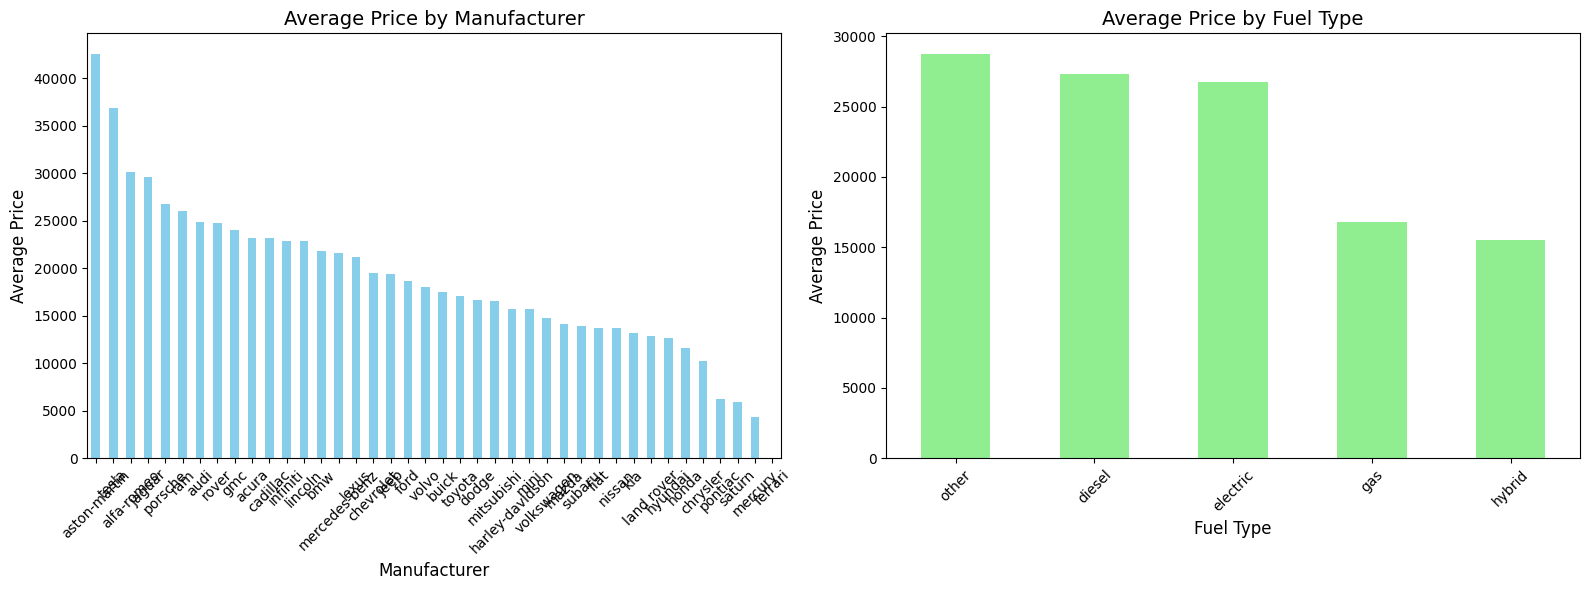

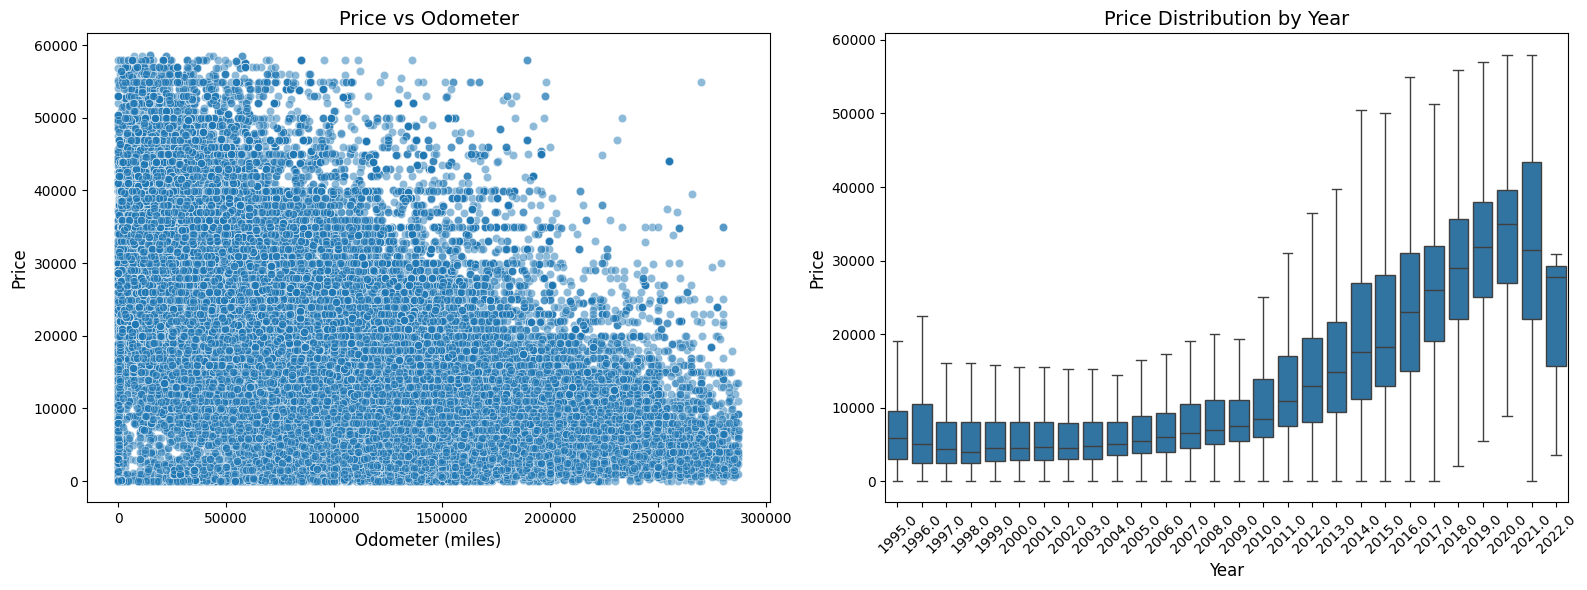

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'sample_data/vehicles.csv'  # Replace with your file path
vehicles_data = pd.read_csv(file_path)

# Select relevant columns and clean data
features = ['year', 'manufacturer', 'fuel', 'odometer', 'condition', 'type', 'paint_color', 'price']
vehicles_data_cleaned = vehicles_data[features].dropna()
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['price'] > 0]

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'price')
vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'odometer')
vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'year')

# Creating subplots for categorical variable analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Average Price by Manufacturer
avg_price_by_manufacturer = vehicles_data_cleaned.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
avg_price_by_manufacturer.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Average Price by Manufacturer', fontsize=14)
axes[0].set_xlabel('Manufacturer', fontsize=12)
axes[0].set_ylabel('Average Price', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Subplot 2: Average Price by Fuel Type
avg_price_by_fuel = vehicles_data_cleaned.groupby('fuel')['price'].mean().sort_values(ascending=False)
avg_price_by_fuel.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Average Price by Fuel Type', fontsize=14)
axes[1].set_xlabel('Fuel Type', fontsize=12)
axes[1].set_ylabel('Average Price', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Creating subplots for continuous variable analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Price vs Odometer
sns.scatterplot(x='odometer', y='price', data=vehicles_data_cleaned, alpha=0.5, ax=axes[0])
axes[0].set_title('Price vs Odometer', fontsize=14)
axes[0].set_xlabel('Odometer (miles)', fontsize=12)
axes[0].set_ylabel('Price', fontsize=12)

# Subplot 2: Price Distribution by Year
sns.boxplot(x='year', y='price', data=vehicles_data_cleaned, showfliers=False, ax=axes[1])
axes[1].set_title('Price Distribution by Year', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Price', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load the dataset
file_path = 'sample_data/vehicles.csv'  # Adjust to your file path
vehicles_data = pd.read_csv(file_path)

# Select relevant columns
features = ['year', 'manufacturer', 'fuel', 'odometer', 'condition', 'type', 'paint_color']
target = 'price'
vehicles_data_cleaned = vehicles_data[features + [target]].dropna()
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['price'] > 0]

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'price')
vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'year')
vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'odometer')
vehicles_data_cleaned = vehicles_data_cleaned[vehicles_data_cleaned['year'] >= 1990]

# Splitting the data into features (X) and target (y)
X = vehicles_data_cleaned[features]
y = vehicles_data_cleaned[target]

# Preprocessing: One-hot encoding with handle_unknown='ignore' and scaling numerical variables
categorical_features = ['manufacturer', 'fuel', 'condition', 'type', 'paint_color']
numerical_features = ['year', 'odometer']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regressors with their hyperparameters
regressors = {
    'ridge': (Ridge(), {'regressor__alpha': [0.1, 1, 10], 'regressor__solver': ['auto', 'lsqr', 'sag']}),
    'lasso': (Lasso(), {'regressor__alpha': [0.1, 1, 10]}),
    'elasticnet': (ElasticNet(), {'regressor__alpha': [0.1, 1, 10], 'regressor__l1_ratio': [0.2, 0.5, 0.8]}),
    'linear': (LinearRegression(), {}),
    'randomforest': (RandomForestRegressor(), {'regressor__n_estimators': [50, 100], 'regressor__max_depth': [None, 10, 20]})
}

# Create a placeholder for all parameter grids
param_grids = []

# Loop through each regressor and add it to the grid search
for name, (model, params) in regressors.items():
    # Add the regressor to the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Add model-specific parameters to the parameter grid
    param_grid = {'regressor': [model]}  # Specify the model
    param_grid.update(params)  # Add model-specific hyperparameters
    param_grids.append((pipeline, param_grid))

# Run GridSearchCV for each pipeline
best_results = []

for pipeline, param_grid in param_grids:
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, error_score='raise')
    grid_search.fit(X_train, y_train)

    # Store results
    best_results.append({
        'model': grid_search.best_estimator_.named_steps['regressor'].__class__.__name__,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    })

# Display the results
print("Best Results for Each Model:")
for result in best_results:
    print(f"Model: {result['model']}, Best Params: {result['best_params']}, Best R2 Score: {result['best_score']}")

# Extracting coefficients from Ridge regression (if it's the best model)
ridge_results = [result for result in best_results if result['model'] == 'Ridge']
if ridge_results:
    best_ridge_model = ridge_results[0]
    ridge_pipeline = grid_search.best_estimator_  # Assuming the Ridge pipeline
    ridge_model = ridge_pipeline.named_steps['regressor']
    feature_names = ridge_pipeline.named_steps['preprocessor'].get_feature_names_out()

    # Matching coefficients with feature names
    coefficients = ridge_model.coef_
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

    # Sorting by absolute magnitude for better interpretability
    coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
    coefficients_df_sorted = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

    # Displaying top coefficients
    print("\nTop Coefficients for Ridge Regression:")
    print(coefficients_df_sorted.head(10))


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
# Feature Importance Analysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Load and preprocess the dataset
data = pd.read_csv('sample_data/vehicles.csv')
columns_to_keep = ['price', 'year', 'odometer', 'manufacturer', 'fuel', 'transmission']
data = data[columns_to_keep].dropna()

# Remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
data = remove_outliers(data, 'price')

# Encode categorical variables
label_encoders = {}
for col in ['manufacturer', 'fuel', 'transmission']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Prepare features and target
X = data.drop(columns=['price'])
y = data['price']

# Normalize numeric features
scaler = StandardScaler()
X[['year', 'odometer']] = scaler.fit_transform(X[['year', 'odometer']])
X['year_odometer_interaction'] = X['year'] * X['odometer']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)




KeyboardInterrupt: 

In [ ]:
# used car analysis


In [ ]:

import pandas as pd

# Reloading the dataset
file_path = 'sample_data/vehicles.csv'
used_car_data = pd.read_csv(file_path)

# Display the first few rows to understand the dataset structure
used_car_data.head()

# Select relevant columns for used car pricing
columns_to_keep = ['price', 'year', 'manufacturer', 'fuel', 'odometer', 'condition']
used_car_data_cleaned = used_car_data[columns_to_keep]

# Drop rows with missing values in critical columns
used_car_data_cleaned = used_car_data_cleaned.dropna()

# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal
used_car_data_cleaned = remove_outliers(used_car_data_cleaned, 'price')
used_car_data_cleaned = remove_outliers(used_car_data_cleaned, 'year')
used_car_data_cleaned = remove_outliers(used_car_data_cleaned, 'odometer')

# Add derived features
current_year = 2024
used_car_data_cleaned['age'] = current_year - used_car_data_cleaned['year']
used_car_data_cleaned['mileage_per_year'] = (
    used_car_data_cleaned['odometer'] / used_car_data_cleaned['age'].replace(0, 1)
)

# Display the cleaned dataset
print(used_car_data_cleaned)

        price    year manufacturer    fuel  odometer  condition   age  \
27      33590  2014.0          gmc     gas   57923.0       good  10.0   
28      22590  2010.0    chevrolet     gas   71229.0       good  14.0   
29      39590  2020.0    chevrolet     gas   19160.0       good   4.0   
30      30990  2017.0       toyota     gas   41124.0       good   7.0   
31      15000  2013.0         ford     gas  128000.0  excellent  11.0   
...       ...     ...          ...     ...       ...        ...   ...   
426875  23590  2019.0       nissan     gas   32226.0       good   5.0   
426876  30590  2020.0        volvo     gas   12029.0       good   4.0   
426877  34990  2020.0     cadillac  diesel    4174.0       good   4.0   
426878  28990  2018.0        lexus     gas   30112.0       good   6.0   
426879  30590  2019.0          bmw     gas   22716.0       good   5.0   

        mileage_per_year  
27           5792.300000  
28           5087.785714  
29           4790.000000  
30           58

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['age', 'mileage_per_year', 'manufacturer', 'fuel', 'condition']
target = 'price'

X = used_car_data_cleaned[features]
y = used_car_data_cleaned[target]

# Preprocessing: One-hot encode categorical features and scale numerical features with handle_unknown='ignore'
categorical_features = ['manufacturer', 'fuel', 'condition']
numerical_features = ['age', 'mileage_per_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
mse, r2



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(73955570.61323008, 0.534413991289771)

# Game

In [ ]:
# Re-import necessary library
import pandas as pd

# Load the dataset
file_path = 'sample_data/vehicles.csv'
vehicles_data = pd.read_csv(file_path)

# Display the structure of the dataset to understand its contents
vehicles_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#data cleaning

In [ ]:
# Data Cleaning

# Remove rows with missing target variable 'price' or critical feature 'year'
vehicles_data_cleaned = vehicles_data.dropna(subset=['price', 'year', 'manufacturer', 'odometer'])

# Convert 'year' to integer
vehicles_data_cleaned['year'] = vehicles_data_cleaned['year'].astype(int)

# Remove outliers in 'price' using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

vehicles_data_cleaned = remove_outliers(vehicles_data_cleaned, 'price')

# Derive 'age' of the car
current_year = 2024
vehicles_data_cleaned['age'] = current_year - vehicles_data_cleaned['year']

# Remove 'VIN' and other irrelevant or excessively missing columns
columns_to_drop = ['id', 'region', 'VIN', 'size', 'model']
vehicles_data_cleaned = vehicles_data_cleaned.drop(columns=columns_to_drop)

# Fill missing categorical data with 'unknown'
categorical_columns = ['condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'title_status']
vehicles_data_cleaned[categorical_columns] = vehicles_data_cleaned[categorical_columns].fillna('unknown')

# Display cleaned dataset info
vehicles_data_cleaned.info()


<ipython-input-8-2f48a65ca033>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_data_cleaned['year'] = vehicles_data_cleaned['year'].astype(int)
<ipython-input-8-2f48a65ca033>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_data_cleaned['age'] = current_year - vehicles_data_cleaned['year']


<class 'pandas.core.frame.DataFrame'>
Index: 397804 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         397804 non-null  int64  
 1   year          397804 non-null  int64  
 2   manufacturer  397804 non-null  object 
 3   condition     397804 non-null  object 
 4   cylinders     234488 non-null  object 
 5   fuel          397804 non-null  object 
 6   odometer      397804 non-null  float64
 7   title_status  397804 non-null  object 
 8   transmission  397804 non-null  object 
 9   drive         397804 non-null  object 
 10  type          397804 non-null  object 
 11  paint_color   397804 non-null  object 
 12  state         397804 non-null  object 
 13  age           397804 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 45.5+ MB


#perform exploratory data analysi


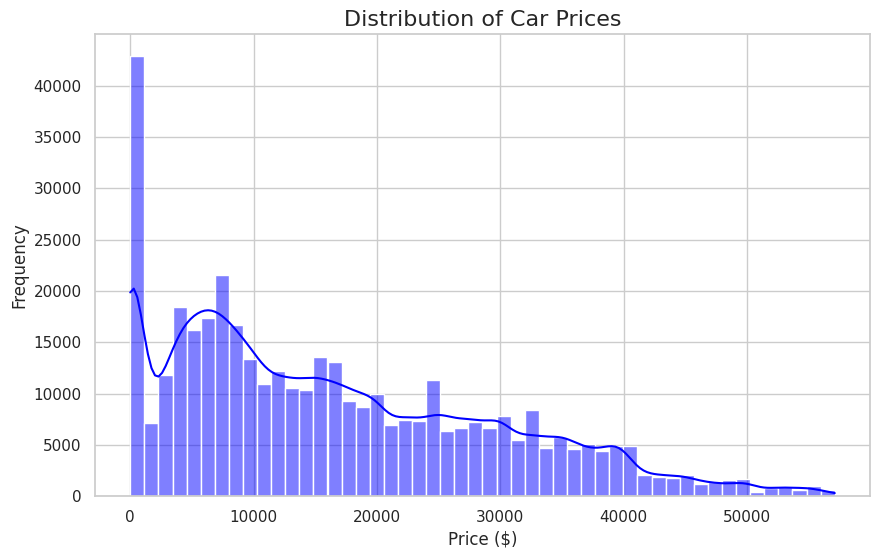

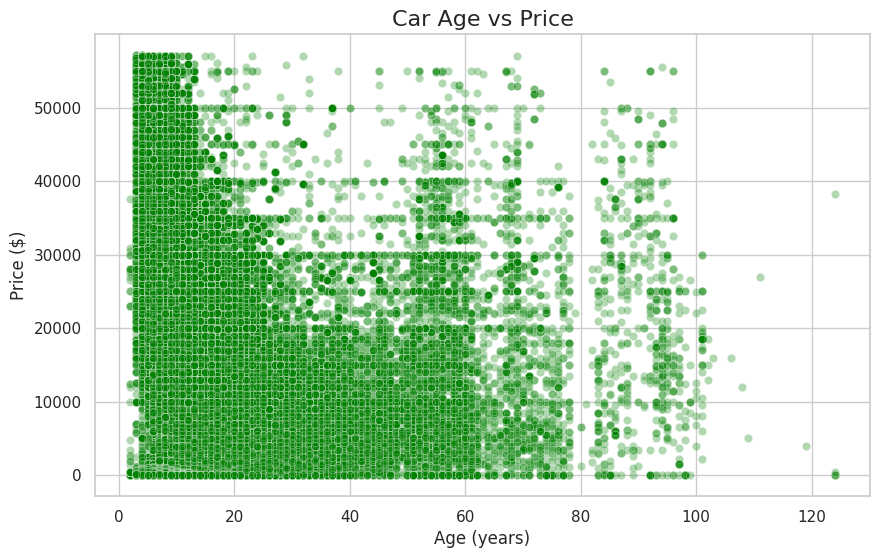

<ipython-input-9-673f03dac419>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=vehicles_data_cleaned[vehicles_data_cleaned['manufacturer'].isin(top_manufacturers)],


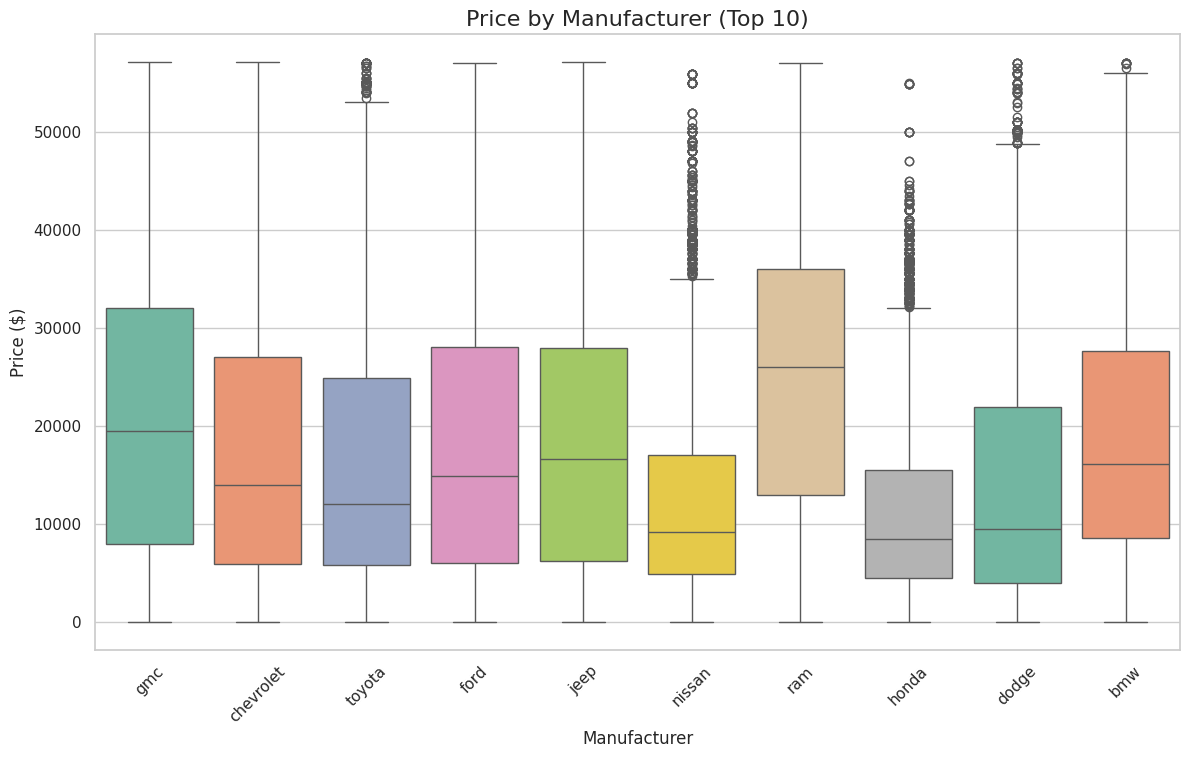

<ipython-input-9-673f03dac419>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=vehicles_data_cleaned, x='fuel', y='price', palette='muted')


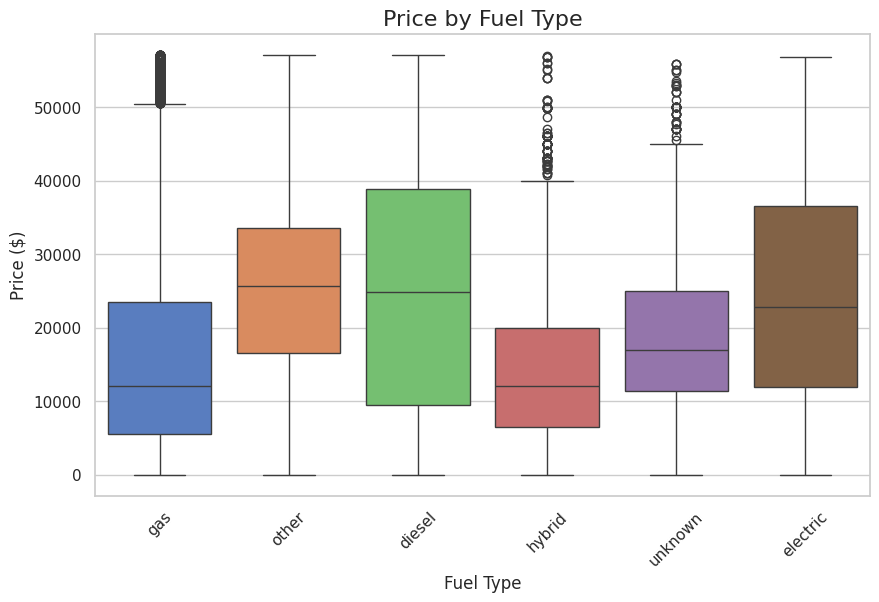

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Visualize the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(vehicles_data_cleaned['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Relationship between car age and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicles_data_cleaned, x='age', y='price', alpha=0.3, color='green')
plt.title('Car Age vs Price', fontsize=16)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.show()

# Boxplot of price by manufacturer
top_manufacturers = vehicles_data_cleaned['manufacturer'].value_counts().head(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(data=vehicles_data_cleaned[vehicles_data_cleaned['manufacturer'].isin(top_manufacturers)],
            x='manufacturer', y='price', palette='Set2')
plt.title('Price by Manufacturer (Top 10)', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Price distribution by fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(data=vehicles_data_cleaned, x='fuel', y='price', palette='muted')
plt.title('Price by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#Correlation analysis


Explore relationships between numerical features (odometer, age, etc.) and price.

<ipython-input-10-96a602945b21>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_data_cleaned['price'] = pd.to_numeric(vehicles_data_cleaned['price'], errors='coerce')
<ipython-input-10-96a602945b21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_data_cleaned['year'] = pd.to_numeric(vehicles_data_cleaned['year'], errors='coerce')
<ipython-input-10-96a602945b21>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

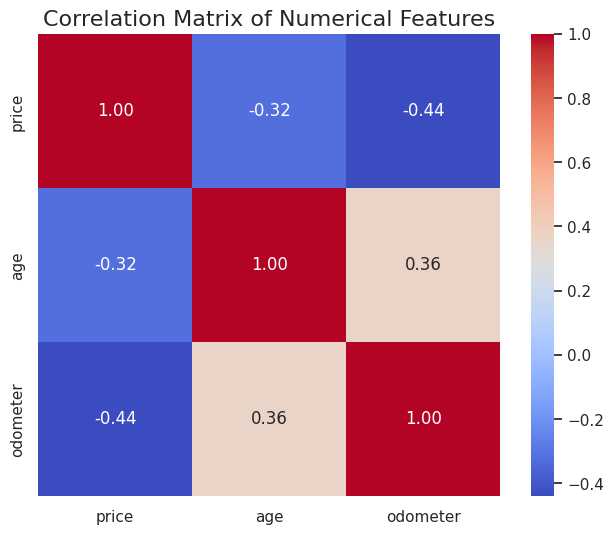

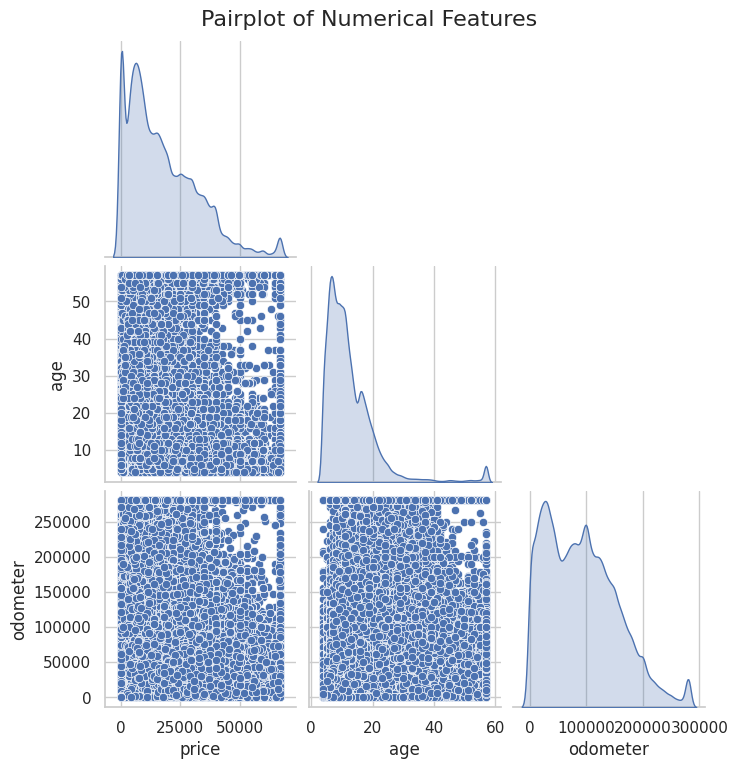

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'sample_data/vehicles.csv'  # Replace with the actual path
vehicles_data = pd.read_csv(file_path)

# Select relevant columns and clean data
vehicles_data_cleaned = vehicles_data.dropna(subset=['price', 'year', 'odometer'])
vehicles_data_cleaned['price'] = pd.to_numeric(vehicles_data_cleaned['price'], errors='coerce')
vehicles_data_cleaned['year'] = pd.to_numeric(vehicles_data_cleaned['year'], errors='coerce')
vehicles_data_cleaned['odometer'] = pd.to_numeric(vehicles_data_cleaned['odometer'], errors='coerce')

# Derive car age
current_year = 2024
vehicles_data_cleaned['age'] = current_year - vehicles_data_cleaned['year']

# Remove outliers in numerical columns (price, age, odometer)
numerical_columns = ['price', 'age', 'odometer']
for col in numerical_columns:
    lower_bound = vehicles_data_cleaned[col].quantile(0.01)
    upper_bound = vehicles_data_cleaned[col].quantile(0.99)
    vehicles_data_cleaned[col] = vehicles_data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Correlation matrix
correlation_matrix = vehicles_data_cleaned[['price', 'age', 'odometer']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

# Retry pairplot for numerical features
sns.pairplot(vehicles_data_cleaned[['price', 'age', 'odometer']], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=16)
plt.show()
